# Running Prediciton and Optimization for solving Stochastic problems

In [1]:
# Basic Imports
import numpy as np
import pandas as pd

# oter libs
import random
import io
import requests

# import plotting imports
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# setting seed values
np.random.seed(1234)

# pandas confing

# plotting config
%matplotlib inline


In [3]:
# Ml imports
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\jkapila\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### Getting a sample data

In [6]:
# this is quaterly beef data
# url="https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/beef.csv"
url = "https://covidtracking.com/api/v1/states/daily.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [7]:
df.head(20)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200412,AK,272.0,7766.0,NaN,NaN,31.0,NaN,NaN,NaN,...,31.0,8038.0,8038.0,8038.0,2,0.0,0.0,291.0,15.0,306.0
1,20200412,AL,3525.0,18058.0,NaN,NaN,437.0,NaN,189.0,NaN,...,437.0,21583.0,21583.0,21583.0,1,2.0,35.0,0.0,334.0,334.0
2,20200412,AR,1280.0,18442.0,NaN,74.0,130.0,NaN,43.0,30.0,...,130.0,19722.0,19722.0,19722.0,5,3.0,0.0,1090.0,54.0,1144.0
3,20200412,AS,0.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,20200412,AZ,3539.0,38570.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,42109.0,42109.0,42109.0,4,7.0,0.0,1433.0,146.0,1579.0
5,20200412,CA,21794.0,168534.0,13200.0,5234.0,NaN,1539.0,NaN,NaN,...,NaN,203528.0,190328.0,190328.0,6,110.0,0.0,15930.0,2322.0,18252.0
6,20200412,CO,6893.0,27980.0,NaN,NaN,1376.0,NaN,NaN,NaN,...,1376.0,34873.0,34873.0,34873.0,8,24.0,64.0,1837.0,383.0,2220.0
7,20200412,CT,12035.0,29185.0,NaN,1654.0,NaN,NaN,NaN,NaN,...,NaN,41220.0,41220.0,41220.0,9,60.0,0.0,864.0,525.0,1389.0
8,20200412,DC,1875.0,8765.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10640.0,10640.0,10640.0,11,3.0,0.0,504.0,97.0,601.0
9,20200412,DE,1479.0,9624.0,NaN,190.0,NaN,NaN,NaN,NaN,...,NaN,11103.0,11103.0,11103.0,10,0.0,0.0,0.0,0.0,0.0


In [8]:
df.isnull().sum()

date                           0
state                          0
positive                      15
negative                     152
pending                     1599
hospitalizedCurrently       1747
hospitalizedCumulative      1522
inIcuCurrently              1966
inIcuCumulative             2025
onVentilatorCurrently       1983
onVentilatorCumulative      2087
recovered                   1766
hash                           0
dateChecked                    0
death                        705
hospitalized                1522
total                          2
totalTestResults               2
posNeg                         2
fips                           0
deathIncrease                 56
hospitalizedIncrease          56
negativeIncrease              56
positiveIncrease              56
totalTestResultsIncrease      56
dtype: int64

In [ ]:
# lets make year and quarter as a index

In [9]:
# since this is time series data we can make  split just by time
df.tail(10)

,Year,Quarter,Quantity,Price
81,1997,2,17.2994,278.9667
82,1997,3,17.0513,281.0667
83,1997,4,16.2354,279.3000
84,1998,1,16.6884,273.4667
85,1998,2,17.1985,278.1000
86,1998,3,17.5085,277.3667
87,1998,4,16.6475,279.5333
88,1999,1,16.6785,278.0000
89,1999,2,17.7635,284.7667
90,1999,3,17.6689,289.2333


#### Splitting data for training and testing

In [56]:
# lets keep data from 1988 as test data
train_df = df[:80]
test_df = df[80:]

In [57]:
train_df.tail()

,Year,Quarter,Quantity,Price
75,1995,4,16.3476,285.2667
76,1996,1,17.0783,278.7000
77,1996,2,17.6763,277.4000
78,1996,3,17.1606,279.8000
79,1996,4,16.2764,285.0333


In [58]:
test_df

,Year,Quarter,Quantity,Price
80,1997,1,16.2921,278.8000
81,1997,2,17.2994,278.9667
82,1997,3,17.0513,281.0667
83,1997,4,16.2354,279.3000
84,1998,1,16.6884,273.4667
85,1998,2,17.1985,278.1000
86,1998,3,17.5085,277.3667
87,1998,4,16.6475,279.5333
88,1999,1,16.6785,278.0000
89,1999,2,17.7635,284.7667


### Prediction usign OLS and Recursive OLS

#### Simple OLS Regression

In [59]:
ols_model = ols("Quantity ~ Price", data=train_df).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     762.5
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           5.12e-42
Time:                        01:31:14   Log-Likelihood:                -66.866
No. Observations:                  80   AIC:                             137.7
Df Residuals:                      78   BIC:                             142.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0742      0.420     71.528      0.0

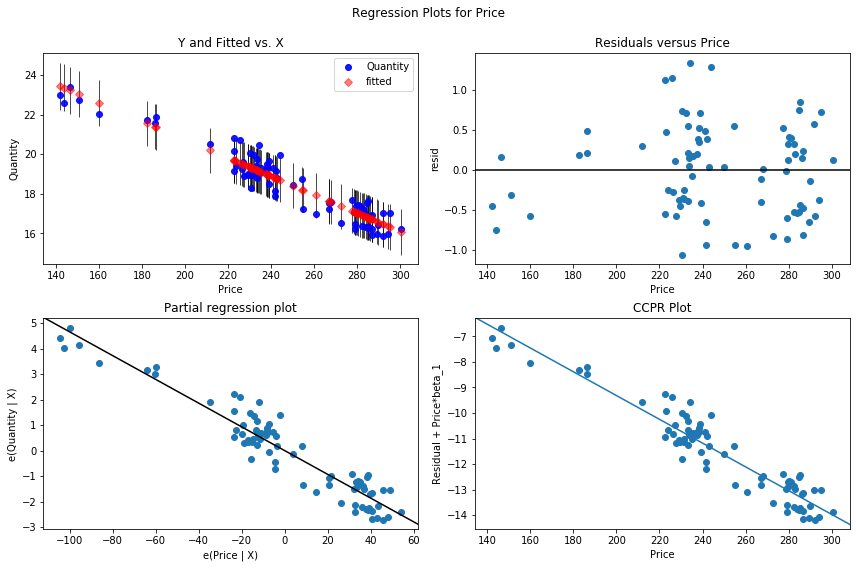

In [60]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(ols_model, 'Price', fig=fig)

In [61]:
# making prediction
ols_model.predict(test_df['Price'])

80    17.086190
81    17.078424
82    16.980595
83    17.062897
84    17.334643
85    17.118799
86    17.152960
87    17.052029
88    17.123458
89    16.808229
90    16.600151
dtype: float64

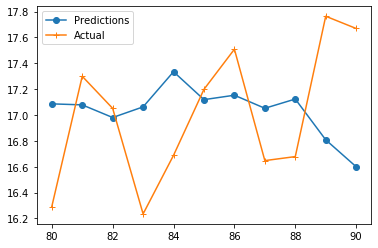

In [71]:
fig, ax = plt.subplots()
ax.plot(ols_model.predict(test_df), 'o-', label="Predictions")
ax.plot(test_df['Quantity'], '+-', label="Actual")
# ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

#### Recursinve OLS Model

In [63]:
# Defining dependent variable
endog = train_df['Quantity']

# To the regressors in the dataset, we add a column of ones for an intercept
exog = sm.add_constant(train_df['Price'])

In [64]:
mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:               Quantity   No. Observations:                   80
Model:                    RecursiveLS   Log Likelihood                 -76.025
Date:                Sun, 12 Apr 2020   R-squared:                       0.907
Time:                        01:31:15   AIC                            156.051
Sample:                             0   BIC                            160.815
                                 - 80   HQIC                           157.961
Covariance Type:            nonrobust   Scale                            0.320
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0742      0.420     71.528      0.000      29.250      30.898
Price         -0.0466      0.002    -27.614      0.000      -0.050      -0.043
Ljung-Box (Q):                      351.52   Jarque-

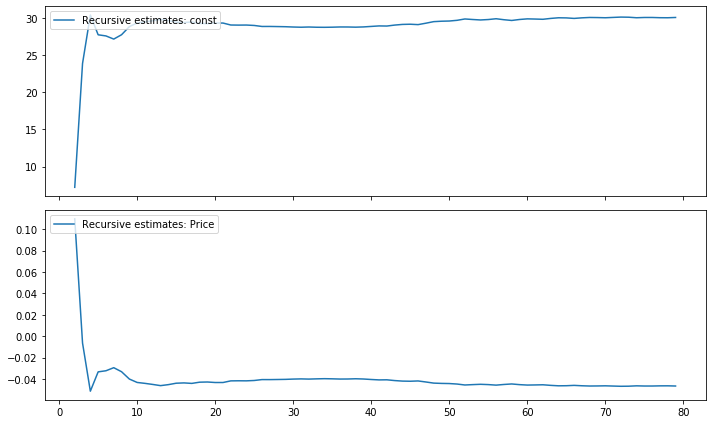

In [65]:
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6));

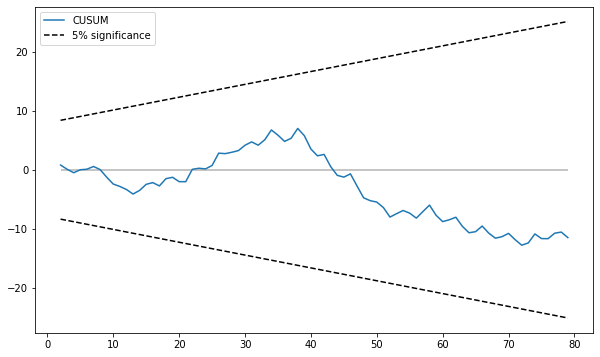

In [66]:
fig = res.plot_cusum(figsize=(10,6))

In [67]:
print(mod.smooth().predict())

0      0.000000
1     23.283360
2     22.054458
3     23.728578
4     22.847576
        ...    
75    16.796227
76    17.089335
77    17.149642
78    17.049848
79    16.809565
Length: 80, dtype: float64


#### And a simple GLM Model

In [68]:
glm_model = sm.GLM(endog, exog).fit()
print(glm_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Quantity   No. Observations:                   80
Model:                            GLM   Df Residuals:                       78
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.31953
Method:                          IRLS   Log-Likelihood:                -66.866
Date:                Sun, 12 Apr 2020   Deviance:                       24.924
Time:                        01:31:18   Pearson chi2:                     24.9
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0742      0.420     71.528      0.0

In [69]:
glm_model.predict(sm.add_constant(test_df['Price']))

80    17.086190
81    17.078424
82    16.980595
83    17.062897
84    17.334643
85    17.118799
86    17.152960
87    17.052029
88    17.123458
89    16.808229
90    16.600151
dtype: float64

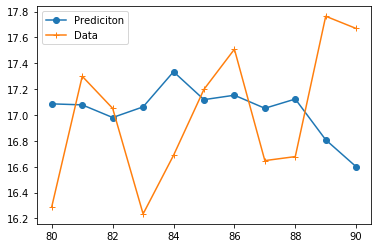

In [70]:
fig, ax = plt.subplots()
ax.plot(glm_model.predict(sm.add_constant(test_df['Price'])), 'o-', label="Prediciton")
ax.plot(test_df['Quantity'], '+-', label="Data")
# ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
ax.legend(loc="best");

#### c) SUMMARIZE RESULT & CHECK GRAPH (RANDOM FOREST & LINREG)

In [72]:
df_summ = pd.DataFrame({'test_x': test_df['Price'],
                        'test_y': test_df['Quantity'], 
                        'test_ols_pred': ols_model.predict(test_df), 
                        'test_glm_pred': glm_model.predict(sm.add_constant(test_df['Price']))})
df_summ['diff_rf_actual'] = df_summ['test_ols_pred'] - df_summ['test_y']
df_summ['diff_lr_actual'] = df_summ['test_glm_pred'] - df_summ['test_y']

# toy data is simple, hence prediction is rather powerful as we only have few missed prediction
# even so, in this kind of cases:
# --> we will lose potential profit if prediction < demand
# --> we will incur unnecessary cost if prediction > demand as we cannot sell the remaining goods at selling price 
df_summ[(df_summ['diff_rf_actual'] != 0) | (df_summ['diff_lr_actual'] != 0)] 

C:\Users\jkapila\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,test_x,test_y,test_ols_pred,test_glm_pred,diff_rf_actual,diff_lr_actual
80,278.8000,16.2921,17.086190,17.086190,0.794090,0.794090
81,278.9667,17.2994,17.078424,17.078424,-0.220976,-0.220976
82,281.0667,17.0513,16.980595,16.980595,-0.070705,-0.070705
83,279.3000,16.2354,17.062897,17.062897,0.827497,0.827497
84,273.4667,16.6884,17.334643,17.334643,0.646243,0.646243
85,278.1000,17.1985,17.118799,17.118799,-0.079701,-0.079701
86,277.3667,17.5085,17.152960,17.152960,-0.355540,-0.355540
87,279.5333,16.6475,17.052029,17.052029,0.404529,0.404529
88,278.0000,16.6785,17.123458,17.123458,0.444958,0.444958
89,284.7667,17.7635,16.808229,16.808229,-0.955271,-0.955271


<Figure size 432x288 with 0 Axes>

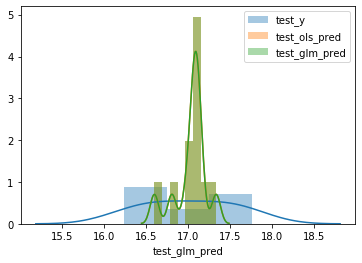

In [75]:
plt.figure()

components = [df_summ['test_y'], df_summ['test_ols_pred'], df_summ['test_glm_pred']]
labels=['test_y', 'test_ols_pred', 'test_glm_pred']

fig, axes = plt.subplots(1)
for component in components:
    sns.distplot(component)

axes.legend(labels=labels)    
plt.show()

### 4) STOCHASTIC PROGRAMMING
#### a) DISCRETIZING DEMAND: TO CAPTURE PROBABILITY OF EACH POSSIBLE SCENARIO

In [54]:
# capturing probability of each possible scenario can be done in many ways, 
# ranging from simple descriptive analytics to more complicated things like
# moment matching, monte carlo simulation, etc.
# we do the easiest here: do clustering to generate scenario (max 100 scenario for now)

from sklearn.cluster import KMeans

In [55]:
def cluster_1d(df, max_cluster=100):
    '''Cluster data into n different cluster where n is the minimum between unique scenario and max_cluster.
    Input:
    df = dataframe column containing scenario to cluster
    max_cluster = number of maximum cluster we want to have (default=100)
    
    Output:
    cluster_centers_df = mapping between cluster labels and its centers
    cluster_labels_df = mapping between df and its cluster labels   
    '''
    km = KMeans(n_clusters=min(len(df.unique()),max_cluster))
    km.fit(df.values.reshape(-1,1)) 
    
    # get information about center
    centers = np.array(km.cluster_centers_.reshape(1,-1)[0].tolist())
    cluster_centers_df = pd.DataFrame({'cluster_centers':centers,'labels':range(len(centers))})
#     cluster_centers_df.columns = ['cluster_centers']
#     cluster_centers_df['labels'] = range(cluster_centers_df.count())
    
    # get information about labels and add information about center
    cluster_labels_df = pd.DataFrame(np.array(km.labels_))
    cluster_labels_df.columns = ['labels']
    cluster_labels_df = pd.concat([df.reset_index(drop=True), cluster_labels_df], axis=1)
    cluster_labels_df = pd.merge(cluster_labels_df, cluster_centers_df, on='labels', how='left')
    
    return cluster_centers_df, cluster_labels_df

In [81]:
def cluster_summ(df):
    '''Summarize probability for each scenario by referring to result from cluster_1d.
    Input:
    df = dataframe column containing scenario to cluster
    
    Output:
    cluster_proportion_df = dataframe containing complete information about probability for each scenario
    demand = possible scenario to happen
    weight = probability of the possible scenario to happen
    scenarios = indexing for demand
    '''
    cluster_centers_df, cluster_labels_df = cluster_1d(df)
    print(cluster_centers_df.head())
    print(cluster_labels_df.head())

    count_label = cluster_labels_df[['labels']].count().values[0]
    cluster_proportion_df = cluster_labels_df[['cluster_centers', 'labels']].groupby('cluster_centers').count().reset_index(drop=False)
    cluster_proportion_df['count_labels'] = count_label
    cluster_proportion_df['proportion_labels'] = cluster_proportion_df['labels'] / cluster_proportion_df['count_labels']
    cluster_proportion_df['index'] = range(1,cluster_proportion_df.shape[0] + 1)
    cluster_proportion_df['cluster_centers'] = np.round(cluster_proportion_df['cluster_centers'], decimals=(3))
    
    demand = pd.Series(cluster_proportion_df['cluster_centers'].values, index=cluster_proportion_df['index'].values).to_dict()
    weight = pd.Series(cluster_proportion_df['proportion_labels'].values, index=cluster_proportion_df['index'].values).to_dict()
    scenarios = range(1,len(cluster_proportion_df.cluster_centers.values)+1)
    
    return cluster_proportion_df, demand, weight, scenarios

In [90]:
cluster_proportion_df, demand, weight, scenarios = cluster_summ(df=df_train['train_y'])

print('\nValues wee need to see      : ',demand)
print('\nOccurences of values        : ',weight)
print('\nNumber osf scenarios(Values): ',scenarios)

   cluster_centers  labels
0             27.0       0
1             24.0       1
2             29.0       2
3             30.0       3
4             26.0       4
   train_y  labels  cluster_centers
0       27       0             27.0
1       26       4             26.0
2       24       1             24.0
3       31       9             31.0
4       30       3             30.0

Values wee need to see      :  {1: 19.0, 2: 20.0, 3: 21.0, 4: 22.0, 5: 23.0, 6: 24.0, 7: 25.0, 8: 26.0, 9: 27.0, 10: 28.0, 11: 29.0, 12: 30.0, 13: 31.0, 14: 32.0, 15: 33.0, 16: 34.0}

Occurences of values        :  {1: 0.00125, 2: 0.00625, 3: 0.0125, 4: 0.04, 5: 0.065, 6: 0.09375, 7: 0.1175, 8: 0.17125, 9: 0.13875, 10: 0.1275, 11: 0.09, 12: 0.0825, 13: 0.0325, 14: 0.01, 15: 0.00875, 16: 0.0025}

Number osf scenarios(Values):  range(1, 17)


In [80]:
cluster_proportion_df.head()

,cluster_centers,labels,count_labels,proportion_labels,index
0,19.0,1,800,0.00125,1
1,20.0,5,800,0.00625,2
2,21.0,10,800,0.01250,3
3,22.0,32,800,0.04000,4
4,23.0,52,800,0.06500,5


In [87]:
cluster_proportion_df

,cluster_centers,labels,count_labels,proportion_labels,index
0,19.0,1,800,0.00125,1
1,20.0,5,800,0.00625,2
2,21.0,10,800,0.01250,3
3,22.0,32,800,0.04000,4
4,23.0,52,800,0.06500,5
5,24.0,75,800,0.09375,6
6,25.0,94,800,0.11750,7
7,26.0,137,800,0.17125,8
8,27.0,111,800,0.13875,9
9,28.0,102,800,0.12750,10


In [83]:
19.0/800

0.02375

In [86]:
sum([i[1] for i in weight.items()])

1.0000000000000002

#### b) USING PULP TO SOLVE STOCHASTIC PROGRAMMING

In [58]:
# !pip install pulp pygmo deap

In [59]:
from pulp import *

N = 100         # maximum item to purchase
cost_price = 20 # amount paid to the supplier
sell_price = 21 # amount paid by the customer
waste_price = 0 # amount paid if we sell the remaining goods (ie. when we have more stock as prediction > demand)

In [60]:
##########################################
# DEFINE VARIABLES
##########################################

# Defining our problem statement 
M = LpProblem("Newsvendor1", LpMaximize)

# Defining the variable which needs to be optimized
x = LpVariable('x', lowBound=0)

# Defining the scenarios / value demamds / clusterd y values
z = LpVariable.dicts('z', scenarios, 0)

print('Problem Statement: ',M)
print('X variable: ',x)
print('Z variable: ',z)

##########################################
# DEFINE MODELS: CONSTRAINTS
##########################################

for i in scenarios:
    print(demand[i])
    print(weight[i])
    M += x <= N # the maximum value our independent varaible can have for a scenario
    M += z[i] <= x # telling the scenario cannot have more casses than its occurence
    M += z[i] <= demand[i] # defining the upper limit of values a scenario can attain

print('Problem Statement with constraints: ', M)
print('X variable: ', x)
print('Z variable: ', z)
    
##########################################
# DEFINE MODELS: OBJECTIVE
##########################################

M += sum(weight[i] * (sell_price * z[i] + waste_price * (x - z[i])) for i in scenarios) - (cost_price * x) 

print('Problem Statement with constraints and solution points: ',M)
M.solve()


Problem Statement:  Newsvendor1:
MAXIMIZE
None
VARIABLES

X variable:  x
Z variable:  {1: z_1, 2: z_2, 3: z_3, 4: z_4, 5: z_5, 6: z_6, 7: z_7, 8: z_8, 9: z_9, 10: z_10, 11: z_11, 12: z_12, 13: z_13, 14: z_14, 15: z_15, 16: z_16}
19.0
0.00125
20.0
0.00625
21.0
0.0125
22.0
0.04
23.0
0.065
24.0
0.09375
25.0
0.1175
26.0
0.17125
27.0
0.13875
28.0
0.1275
29.0
0.09
30.0
0.0825
31.0
0.0325
32.0
0.01
33.0
0.00875
34.0
0.0025
Problem Statement with constraints:  Newsvendor1:
MAXIMIZE
None
SUBJECT TO
_C1: x <= 100

_C2: - x + z_1 <= 0

_C3: z_1 <= 19

_C4: x <= 100

_C5: - x + z_2 <= 0

_C6: z_2 <= 20

_C7: x <= 100

_C8: - x + z_3 <= 0

_C9: z_3 <= 21

_C10: x <= 100

_C11: - x + z_4 <= 0

_C12: z_4 <= 22

_C13: x <= 100

_C14: - x + z_5 <= 0

_C15: z_5 <= 23

_C16: x <= 100

_C17: - x + z_6 <= 0

_C18: z_6 <= 24

_C19: x <= 100

_C20: - x + z_7 <= 0

_C21: z_7 <= 25

_C22: x <= 100

_C23: - x + z_8 <= 0

_C24: z_8 <= 26

_C25: x <= 100

_C26: - x + z_9 <= 0

_C27: z_9 <= 27

_C28: x <= 100

_C2

1

In [61]:
##########################################
# PRINT RESULTS
##########################################

print("Status = %s" % LpStatus[M.status])

print("%s = %f" % (x.name, x.varValue))
for i in scenarios:
    print("%s = %f" % (z[i].name, z[i].varValue))
print("Objective = %f" % (M.objective.value()))

Status = Optimal
x = 22.000000
z_1 = 19.000000
z_2 = 20.000000
z_3 = 21.000000
z_4 = 22.000000
z_5 = 22.000000
z_6 = 22.000000
z_7 = 22.000000
z_8 = 22.000000
z_9 = 22.000000
z_10 = 22.000000
z_11 = 22.000000
z_12 = 22.000000
z_13 = 22.000000
z_14 = 22.000000
z_15 = 22.000000
z_16 = 22.000000
Objective = 21.396250


#### c) CHECK AS TABLE (MANUAL CALCULATION): TO SEE CLEARLY WHAT HAPPENS

In [62]:
def result_summ(cluster_proportion_df, demand, weight, sell_price, cost_price, waste_price):
    '''Summarize result by comparing possible scenario (example_df) with its possible execution (purchase_df).
    We want to look how much profit we can get given a pair of scenario and its execution, 
    weighted with the probability of each scenario to happen.
    Input:
    cluster_proportion_df = dataframe containing complete information about probability for each scenario
    demand = possible scenario to happen
    weight = probability of the possible scenario to happen
    cost_price = amount paid to the supplier
    sell_price = amount paid by the customer
    waste_price = amount paid if we sell the remaining goods

    Output:
    example_df = dataframe after cross join between possible scenario and possible execution
    example_df_summ = summary of example_df to obtain total expected profit per possible execution
    '''
    
    # get the basic df: purchase_df for the demand and example_df for the possible scenario execution
    purchase_df = pd.DataFrame({'key': 0, 'item_to_purchase': demand})
    example_df = pd.DataFrame({'key': 0, 'item_to_sell': cluster_proportion_df['cluster_centers'], 
                               'probability': cluster_proportion_df['proportion_labels']})
    example_df = example_df.merge(purchase_df, on='key', how='outer')
    example_df = example_df.drop('key', axis=1).sort_values(['item_to_purchase', 'item_to_sell'])
    
    example_df['total_revenue'] = example_df[['item_to_sell', 'item_to_purchase']].min(axis=1) * sell_price
    example_df['total_cost'] = example_df['item_to_purchase'] * cost_price
    example_df['total_profit'] = (example_df['total_revenue'] - example_df['total_cost'])
    
    example_df['total_weighted_profit'] = example_df['probability'] * example_df['total_profit']
    example_df['total_cumsum_profit'] = example_df.groupby('item_to_purchase')['total_weighted_profit'].cumsum()

    example_df_summ = example_df.groupby('item_to_purchase', as_index=False)['total_weighted_profit'].sum()
    
    return example_df, example_df_summ

In [63]:
example_df, example_df_summ = result_summ(cluster_proportion_df=cluster_proportion_df, demand=demand, weight=weight, 
                                          sell_price=sell_price, cost_price=cost_price, waste_price=waste_price)
example_df

,item_to_sell,probability,item_to_purchase,total_revenue,total_cost,total_profit,total_weighted_profit,total_cumsum_profit
0,19.0,0.00125,19.0,399.0,380.0,19.0,0.02375,0.02375
16,20.0,0.00625,19.0,399.0,380.0,19.0,0.11875,0.14250
32,21.0,0.01250,19.0,399.0,380.0,19.0,0.23750,0.38000
48,22.0,0.04000,19.0,399.0,380.0,19.0,0.76000,1.14000
64,23.0,0.06500,19.0,399.0,380.0,19.0,1.23500,2.37500
...,...,...,...,...,...,...,...,...
191,30.0,0.08250,34.0,630.0,680.0,-50.0,-4.12500,-122.07250
207,31.0,0.03250,34.0,651.0,680.0,-29.0,-0.94250,-123.01500
223,32.0,0.01000,34.0,672.0,680.0,-8.0,-0.08000,-123.09500
239,33.0,0.00875,34.0,693.0,680.0,13.0,0.11375,-122.98125


#### d) VISUAL CHECK

In [64]:
# limit the table, we don't want to be overwhelmed
temp = example_df[(example_df['item_to_purchase'] >= 20) & (example_df['item_to_purchase'] <= 25)]
temp.loc[:,'item_to_purchase'] = temp['item_to_purchase'].astype('str')

C:\Users\jkapila\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


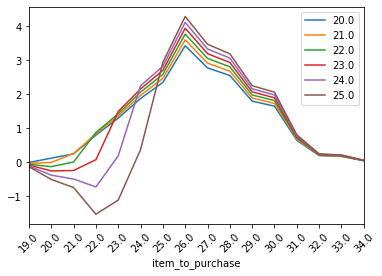

In [65]:
# check the weighted profit per possible scenario: 
# we can see how higher execution causes greater loss during weak demand and hence,
# higher execution number has difficulty in bouncing the profit up 

fig, ax = plt.subplots()

for i in temp['item_to_purchase'].unique():
    temp[temp['item_to_purchase'] == i].plot.line(x='item_to_purchase', y='total_weighted_profit', ax=ax, label=str(i))
plt.xticks(range(0,np.unique(temp['item_to_sell']).shape[0]),np.unique(temp['item_to_sell']),rotation=45)
plt.show()

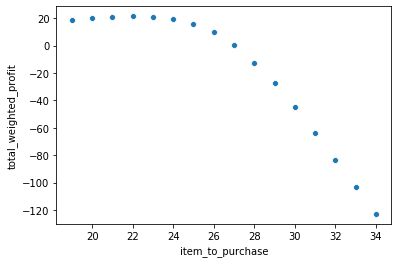

In [66]:
# check the total expected profit, which comes from all possible profit 
# and weighted by the probability of the scenario to happen
plt.figure()
sns.scatterplot(x='item_to_purchase', y='total_weighted_profit', data=example_df_summ)
plt.show()

### 5) PREDICTION + STOCHASTIC PROGRAMMING
#### a) BOOTSTRAPPING

In [67]:
size_bstrap = 50
iter = 100
idx_check = 172
test_y_bstrap = []
coef_bstrap = []
intercept_bstrap = []

for i in range(iter):
    
    # sampling with replacement
    idx = np.random.choice(np.arange(0,train_x.shape[0]), size_bstrap, replace=True)
    train_x_temp = train_x[idx]
    train_y_temp = train_y[idx]
    
    # do linear regression
    lr_bstrap = LinearRegression()
    lr_bstrap.fit(train_x_temp, train_y_temp)
    
    # get coefficient and intercept
    coef_bstrap.append(lr_bstrap.coef_)
    intercept_bstrap.append(lr_bstrap.intercept_)
    
    # get result, only for intended index idx_check
    # test_y_bstrap.append((lr_bstrap.predict(test_x)[idx_check][0]).astype(int))
    result_temp = np.rint(lr_bstrap.intercept_ + lr_bstrap.coef_ * test_x[idx_check])[0,0]
    test_y_bstrap.append(result_temp)
    

In [68]:
result_bstrap = pd.DataFrame({'test_y_bstrap': test_y_bstrap})
result_bstrap['test_x_bstrap'] = test_x[idx_check][0]
result_bstrap

,test_y_bstrap,test_x_bstrap
0,29.0,110
1,29.0,110
2,29.0,110
3,29.0,110
4,29.0,110
...,...,...
95,29.0,110
96,29.0,110
97,29.0,110
98,29.0,110


In [69]:
result_bstrap_summ = result_bstrap.groupby('test_y_bstrap').count().reset_index(drop=False)
result_bstrap_summ

,test_y_bstrap,test_x_bstrap
0,29.0,100


#### b) DISCRETIZING DEMAND

In [37]:
cluster_proportion_df_bstrap, demand_bstrap, weight_bstrap, scenarios_bstrap = cluster_summ(df=result_bstrap['test_y_bstrap'])

print(demand_bstrap)
print(weight_bstrap)
print(scenarios_bstrap)

{1: 26.0}
{1: 1.0}
range(1, 2)


#### c) USING PULP TO SOLVE STOCHASTIC PROGRAMMING

In [91]:
##########################################
# DEFINE VARIABLES
##########################################

M_bstrap = LpProblem("Newsvendor2", LpMaximize)

x_bstrap = LpVariable('x_bstrap', lowBound=0)
z_bstrap = LpVariable.dicts('z_bstrap', scenarios_bstrap, 0)


##########################################
# DEFINE MODELS: CONSTRAINTS
##########################################

for i in scenarios_bstrap:
    print(demand_bstrap[i])
    print(weight_bstrap[i])
    M_bstrap += x_bstrap <= N
    M_bstrap += z_bstrap[i] <= x_bstrap
    M_bstrap += z_bstrap[i] <= demand_bstrap[i]

    
##########################################
# DEFINE MODELS: OBJECTIVE
##########################################

M_bstrap += sum(weight_bstrap[i] * (sell_price * z_bstrap[i] + waste_price * (x_bstrap - z_bstrap[i])) for i in scenarios_bstrap) - (cost_price * x_bstrap) 
M_bstrap.solve()


##########################################
# PRINT RESULTS
##########################################

print("Status = %s" % LpStatus[M_bstrap.status])

print("%s = %f" % (x_bstrap.name, x_bstrap.varValue))
for i in scenarios_bstrap:
    print("%s = %f" % (z_bstrap[i].name, z_bstrap[i].varValue))
print("Objective = %f" % (M_bstrap.objective.value()))



33.0
0.13
34.0
0.87
Status = Optimal
x_bstrap = 33.000000
z_bstrap_1 = 33.000000
z_bstrap_2 = 33.000000
Objective = 33.000000


#### d) CHECK AS TABLE (MANUAL CALCULATION): TO SEE CLEARLY WHAT HAPPENS

In [93]:
example_df_bstrap, example_df_summ_bstrap = result_summ(cluster_proportion_df=cluster_proportion_df_bstrap, 
                                                        demand=demand_bstrap, weight=weight_bstrap, 
                                                        sell_price=sell_price, cost_price=cost_price, 
                                                        waste_price=waste_price)
example_df_bstrap.head(n=5)

,item_to_sell,probability,item_to_purchase,total_revenue,total_cost,total_profit,total_weighted_profit,total_cumsum_profit
0,33.0,0.13,33.0,693.0,660.0,33.0,4.29,4.29
2,34.0,0.87,33.0,693.0,660.0,33.0,28.71,33.00
1,33.0,0.13,34.0,693.0,680.0,13.0,1.69,1.69
3,34.0,0.87,34.0,714.0,680.0,34.0,29.58,31.27


In [92]:
# optimal decision will only change if we increase sales_price (eg. sales_price = 23)
example_df_bstrap, example_df_summ_bstrap = result_summ(cluster_proportion_df=cluster_proportion_df_bstrap, 
                                                        demand=demand_bstrap, weight=weight_bstrap, 
                                                        sell_price=23, cost_price=cost_price, 
                                                        waste_price=waste_price)
example_df_bstrap.head(n=5)

,item_to_sell,probability,item_to_purchase,total_revenue,total_cost,total_profit,total_weighted_profit,total_cumsum_profit
0,33.0,0.13,33.0,759.0,660.0,99.0,12.87,12.87
2,34.0,0.87,33.0,759.0,660.0,99.0,86.13,99.00
1,33.0,0.13,34.0,759.0,680.0,79.0,10.27,10.27
3,34.0,0.87,34.0,782.0,680.0,102.0,88.74,99.01


#### d) VISUAL CHECK

In [83]:
example_df_bstrap.loc[:,'item_to_purchase'] = example_df_bstrap['item_to_purchase'].astype('str')

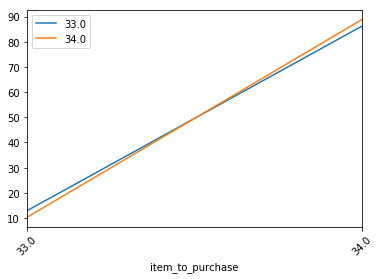

In [84]:
# check the weighted profit per possible scenario: 
# we can see how higher execution causes greater loss during weak demand and hence,
# higher execution number has difficulty in bouncing the profit up 

fig, ax = plt.subplots()

for i in example_df_bstrap['item_to_purchase'].unique():
    example_df_bstrap[example_df_bstrap['item_to_purchase'] == i].plot.line(x='item_to_purchase', y='total_weighted_profit', ax=ax, label=str(i))
plt.xticks(range(0,np.unique(example_df_bstrap['item_to_sell']).shape[0]),np.unique(example_df_bstrap['item_to_sell']),rotation=45)
plt.show()

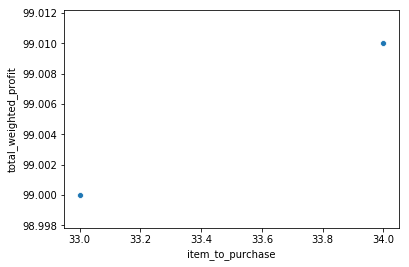

In [85]:
# check the total expected profit, which comes from all possible profit 
# and weighted by the probability of the scenario to happen
plt.figure()
sns.scatterplot(x='item_to_purchase', y='total_weighted_profit', data=example_df_summ_bstrap)
plt.show()

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from scipy import special

In [4]:
a = 1.00001
b = 4
s = np.random.zipf(a, 1000)
# s = np.random.beta(a,b, 100000)
s[::-1].sort()
s[:10]

array([2036344376, 2018858423, 1989193191, 1980725011, 1915776695,
       1866020327, 1858990867, 1813113271, 1808199443, 1751151179])

In [5]:
s = s/np.max(s)

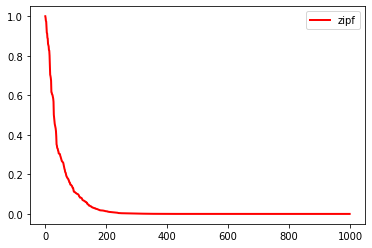

In [6]:

plt.plot(s, linewidth=2, color='r',label='zipf')
# plt.plot(np.log(s1+1), linewidth=2, color='b')
# s1_e = np.exp(-s1) + 1
# s1_e[::-1].sort()
# plt.plot(s1_e, linewidth=2, color='b')
plt.legend()
plt.show()

In [7]:
a, m = 3.,0.1
s2 = (np.random.pareto(a, 1000) + 1) * m
s2[::-1].sort()
s2[:10]

array([1.08061217, 0.9473233 , 0.79803126, 0.78638794, 0.72408266,
       0.65907706, 0.61720633, 0.61227416, 0.52836966, 0.51918828])

In [8]:
s2[s2>.18].shape

(154,)

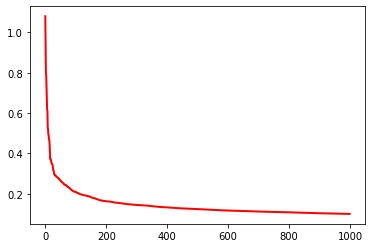

In [9]:
plt.plot(s2, linewidth=2, color='r')
plt.show()

In [10]:
n = 30
1 / np.log(np.arange(2,n+2))

array([1.44269504, 0.91023923, 0.72134752, 0.62133493, 0.55811063,
       0.51389834, 0.48089835, 0.45511961, 0.43429448, 0.41703239,
       0.4024296 , 0.38987125, 0.37892318, 0.36926937, 0.36067376,
       0.35295612, 0.34597626, 0.33962327, 0.3338082 , 0.32845874,
       0.32351545, 0.31892899, 0.31465798, 0.31066747, 0.30692768,
       0.30341308, 0.30010163, 0.2969742 , 0.2940141 , 0.29120668])

In [11]:
def log_dist(n_dist, olog=False):
    n = np.arange(2,n_dist+2)
    if olog:
        return 1/np.log(n)
    return np.exp(np.log(n)/n)

In [12]:
s1 = log_dist(1000)
s1_l = log_dist(1000,True)

In [27]:
n = np.arange(2,1000+2)
n[::-1].sort()
s_lin =  n/1000

In [37]:
def get_weights(n_dist,scheme="zipf"):
    
    # defining the linear values for the distirbution
    n = np.arange(2,n_dist+2)
    
    if scheme == "zipf":
        # Value 1.00001 location and is scaled between 0 and 1. These parameters and defined by iteratively finding best options.
        w = np.random.zipf(1.00001, n_dist)
        w = w/np.max(w)
        
    elif scheme == "pareto":
        # Value 3 and 0.1 are location and sclae parameters and defined by iteratively finding best options.
        w = (np.random.pareto(3, n_dist) + 1) * 0.1 
        
    elif scheme == "log_dist":
        w = 1/np.log(n)
        
    elif scheme == "exp_dist":
        w = np.exp(np.log(n)/n)
    
    elif scheme == "linear":
        w =  n/n_dist
    
    else:
        w = np.ones((n_dist,)) # constant value if no proper weighing scheme is defined
        
    w[::-1].sort()
    return w

In [38]:
# np.ones((10,))
# s

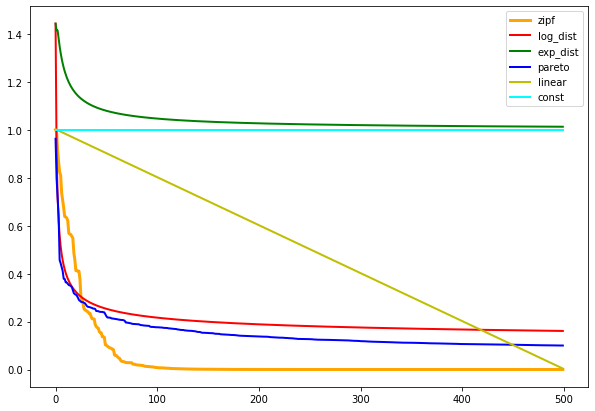

In [48]:
n_dist=500
plt.figure(figsize=(10,7))
plt.plot(, linewidth=3, color='orange',label='zipf')
plt.plot(get_weights(n_dist,scheme="log_dist"), linewidth=2, color='r',label='log_dist')
plt.plot(get_weights(n_dist,scheme="exp_dist"), linewidth=2, color='g',label='exp_dist')
plt.plot(get_weights(n_dist,scheme="pareto"), linewidth=2, color='b',label='pareto')
plt.plot(get_weights(n_dist,scheme="linear"), linewidth=2, color='y',label='linear')
plt.plot(get_weights(n_dist,scheme="const"), linewidth=2, color='cyan',label='const')
plt.legend()
plt.show()

In [51]:
print(np.ones((10,))+25)
print(get_weights(10,scheme="linear"))
(np.ones((10,))+25)*get_weights(10,scheme="linear")

[26. 26. 26. 26. 26. 26. 26. 26. 26. 26.]
[1.1 1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2]


array([28.6, 26. , 23.4, 20.8, 18.2, 15.6, 13. , 10.4,  7.8,  5.2])

C:\Users\jkapila\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


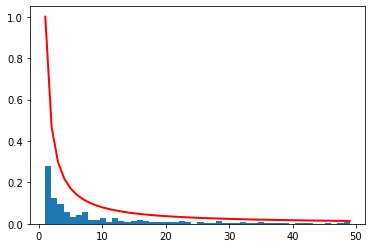

In [94]:
count, bins, ignored = plt.hist(s[s<50], 50, normed=True)
x = np.arange(1., 50.)
y = x**(-a) / special.zetac(a)
plt.plot(x, y/max(y), linewidth=2, color='r')
plt.show()

C:\Users\jkapila\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


NameError: name 'a' is not defined

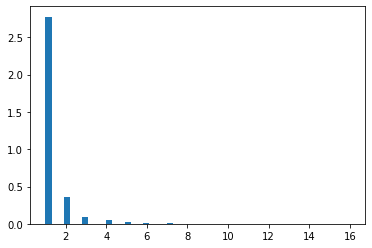

In [84]:
count, bins, ignored = plt.hist(s[s<50], 50, normed=True)
x = np.arange(1., 50.)
y = x**(-a) / special.zetac(a)
plt.plot(x, y/max(y), linewidth=2, color='r')
plt.show()